In [4]:
#import

import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set(style='whitegrid', context='talk', font_scale=1)

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
from network_control.energies import minimum_input, optimal_input, sim_state_eq, integrate_u
from network_control.utils import matrix_normalization
from network_control.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [6]:
# load data
A = np.load('/Users/stiso/Downloads/Archive/A.npy')
A = matrix_normalization(A[:, :, 0], version='continuous')
n = np.shape(A)[0]

Normalizing A for a continuous-time system


## Minimum Energy

In [8]:
B = np.eye(n)
S = np.eye(n)
x0 = np.random.rand(n,1)
xf = np.random.rand(n,1)
T = 5
rho=1
m_x, m_u, n_err = minimum_input(A,T,B,x0,xf)
n_err

1.6703501887823644e-13

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


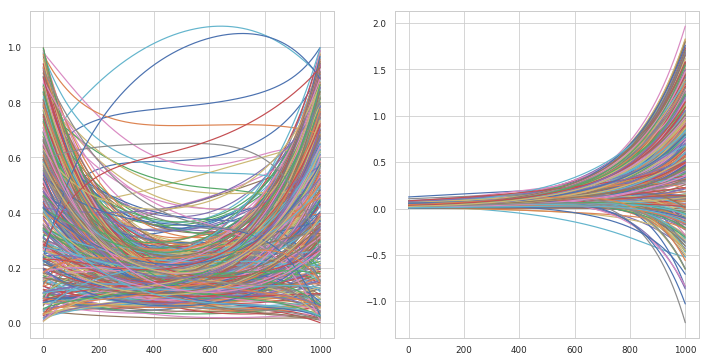

In [9]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(m_x)
ax[1].plot(m_u)
plt.show()

In [19]:
np.mean(integrate_u(m_u))
#np.mean(np.sum(o_u**2,0))

91.00337408213602

## Optimal Energy

In [21]:
o_x, o_u, n_err = optimal_input(A,T,B,x0,xf,rho,S)
n_err

1.6370302663140594e-11

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


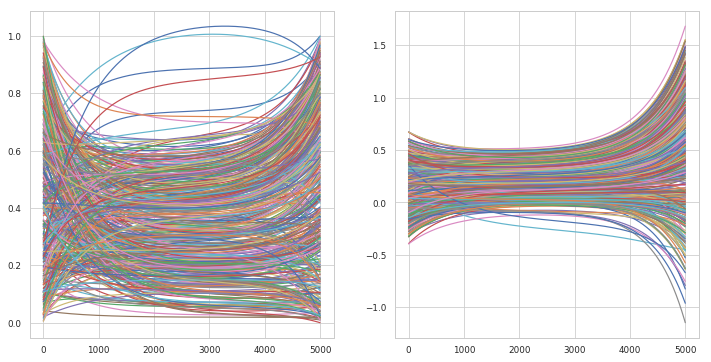

In [25]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(o_x)
ax[1].plot(o_u)
plt.show()

In [36]:
np.mean(integrate_u(o_u))
#np.mean(np.sum(o_u**2,0))

589.1349810554941

### Minimum vs Optimal Energy

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


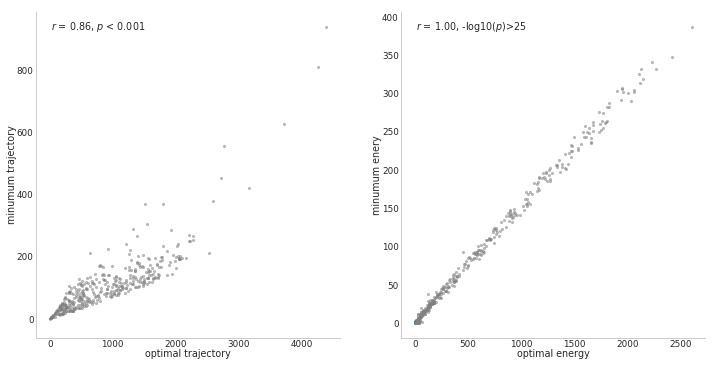

In [37]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
reg_plot(x=integrate_u(o_x), y=integrate_u(m_x), xlabel='optimal trajectory', ylabel='minumum trajectory', ax=ax[0])
reg_plot(x=integrate_u(o_u), y=integrate_u(m_u), xlabel='optimal energy', ylabel='minumum enery', ax=ax[1])
plt.show()

## Simulate State Equation

In [39]:
U = np.random.rand(n,100)
x = sim_state_eq( A, B, x0, U, version='continuous')

Simulating for a continuous-time system


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


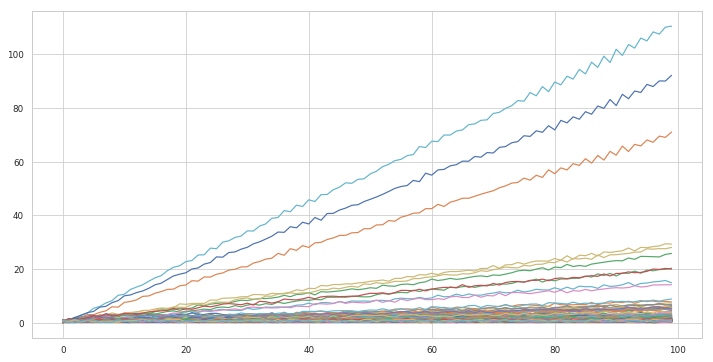

In [40]:
fig,ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(np.squeeze(x.T))
plt.show()

Normalizing A for a continuous-time system
Simulating for a continuous-time system


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


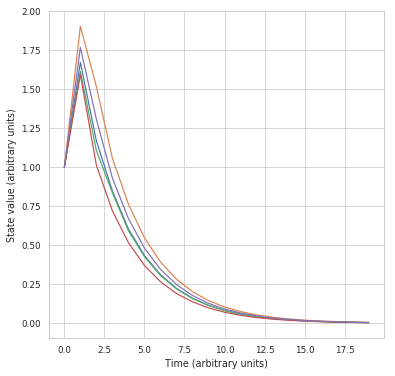

In [47]:
import numpy as np

# initialize matrix
np.random.seed(28)
A = np.random.rand(5,5)
from network_control.utils import matrix_normalization
A = matrix_normalization(A, c=1, version='continuous')
from network_control.energies import sim_state_eq
import matplotlib.pyplot as plt

U = np.zeros((5,20)) # the input to the system
U[:,0] = 1# impulse, 1 energy at the first time point
B = np.eye(5)
x0 = np.ones((5,1))
x = sim_state_eq( A, B, x0, U, 'continuous')
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(np.squeeze(x.T))
plt.xlabel('Time (arbitrary units)')
plt.ylabel('State value (arbitrary units)')
plt.savefig('A_stable.png')
plt.show()

Simulating for a discrete-time system


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


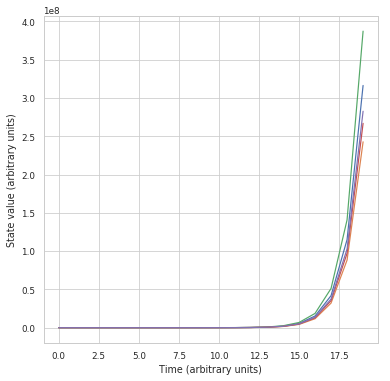

In [46]:
A_unstable = np.random.rand(5,5)
x = sim_state_eq( A_unstable, B, x0, U, version='discrete')
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(np.squeeze(x.T))
plt.xlabel('Time (arbitrary units)')
plt.ylabel('State value (arbitrary units)')
plt.savefig('A_unstable.png')
plt.show()